In [3]:
import pandas as pd 
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("StudentPerformanceFactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## we can notice there are missing values in 3 columns so we are going to replace them 
### this is not the smartest way for cleaning the culumns beacuse it could give some bias but sinc this is mostly training and the missing values are few this should be good for the most paet 

In [7]:
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [9]:
num_fetures = [col for col in df.columns if df[col].dtype=='int64' and col!='Exam_Score']
print(len(num_fetures))
cat_fetures=[col for col in df.columns if df[col].dtype=="object"]
print(len(cat_fetures))

6
13


In [10]:
x = df.drop('Exam_Score',axis=1)
y= df['Exam_Score']

x_train,x_test,y_tran,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_fetures),
        ('cat',OneHotEncoder(handle_unknown="ignore"),cat_fetures)
    ]
)

In [12]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [13]:
model.fit(x_train,y_tran)
y_pred = model.predict(x_test)


In [14]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.7696495724907311
RMSE: 1.8044445092722843


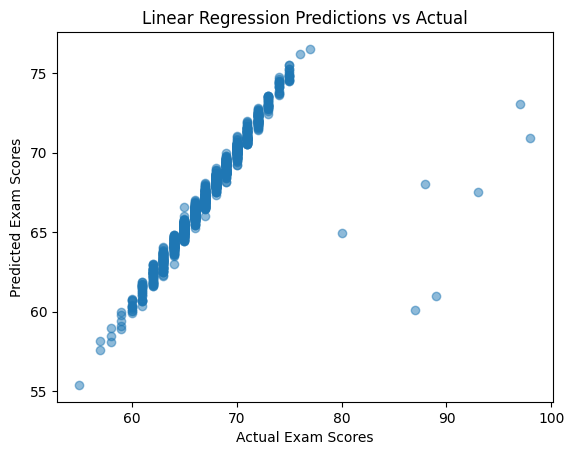

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression Predictions vs Actual")
plt.show()


In [24]:
results = pd.DataFrame({
    'Actual_Exam_Score': y_test.values,
    'Predicted_Exam_Score': y_pred
})

print(results.head(10))

   Actual_Exam_Score  Predicted_Exam_Score
0                 65             64.526283
1                 65             65.265114
2                 71             71.531263
3                 64             64.277481
4                 66             66.521653
5                 66             66.612463
6                 72             72.470949
7                 66             66.498269
8                 70             69.986045
9                 70             70.133271


In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])
poly_model.fit(x_train, y_tran)
y_poly_pred = poly_model.predict(x_test)

print("Polynomial R²:", r2_score(y_test, y_poly_pred))

Polynomial R²: 0.7471205766472642


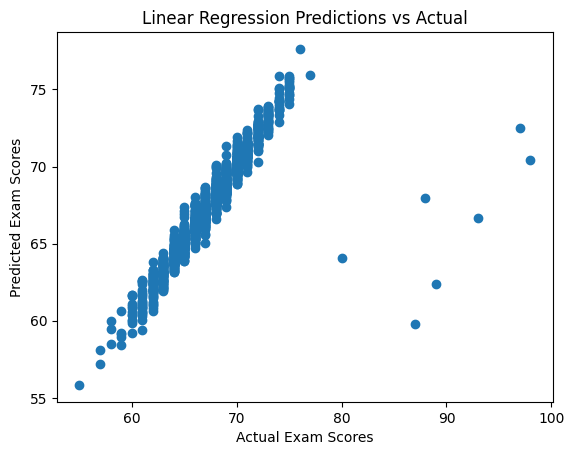

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_poly_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression Predictions vs Actual")
plt.show()


In [25]:
results2 = pd.DataFrame({
    'Actual_Exam_Score': y_test.values,
    'Predicted_Exam_Score': y_poly_pred
})

print(results2.head(10))

   Actual_Exam_Score  Predicted_Exam_Score
0                 65             64.656607
1                 65             64.786321
2                 71             71.175125
3                 64             63.850525
4                 66             66.484171
5                 66             65.881808
6                 72             71.941820
7                 66             66.197780
8                 70             69.612894
9                 70             70.091253
